# Final Project for CMPS240

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#reading dataset
top10s = pd.read_table('top10s.csv', sep = ',', index_col = 0)
top10s.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [17]:
#Cleaning Data
#Overview for checking missing values and datatypes:
top10s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [5]:
#Cleaning Data: Initial Observations
    #Beyonce's name causing random chars for 'e'
    #298: Beyonce song (originally said 43776, instead of 7/11)
    #121: add feature Nicki Minaj

#fix every instance of "BeyoncÃ©" in dataset
top10s['artist'].replace({"BeyoncÃ©":"Beyoncé"}, inplace = True)
#fix specific title errors 
top10s['title'].replace({"43776":"7/11", "Beauty And A Beat":"Beauty And A Beat (feat. Nicki Minaj)"}, inplace = True)

print ("\nPOST-CORRECTIONS:\n", top10s.iloc[297], "\n\n", top10s.iloc[120])


POST-CORRECTIONS:
 title             7/11
artist         BeyoncÈ
top genre    dance pop
year              2015
bpm                136
nrgy                71
dnce                75
dB                  -5
live                13
val                 56
dur                214
acous                1
spch                13
pop                 72
Name: 298, dtype: object 

 title        Beauty And A Beat (feat. Nicki Minaj)
artist                               Justin Bieber
top genre                             canadian pop
year                                          2012
bpm                                            128
nrgy                                            84
dnce                                            60
dB                                              -5
live                                             7
val                                             53
dur                                            228
acous                                            0
spch              

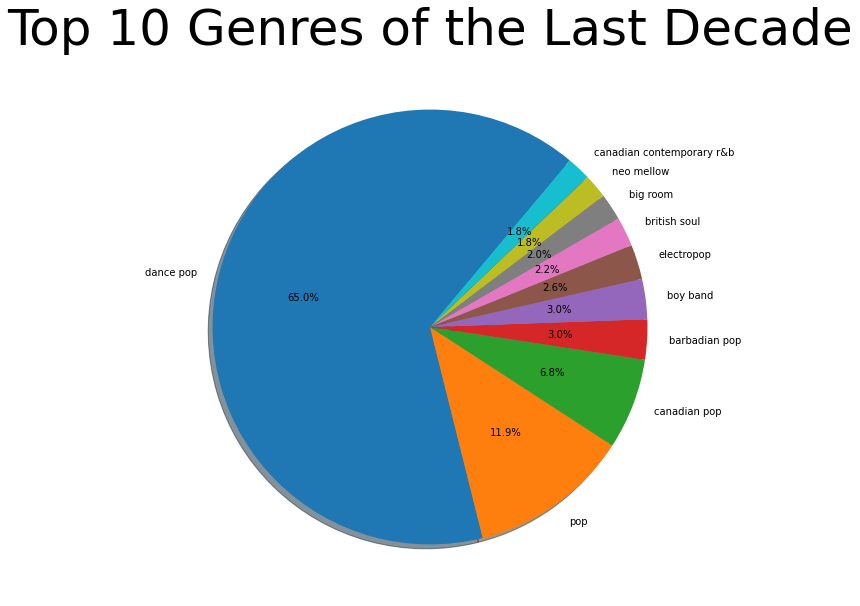

In [18]:
#Pie chart with percentages of genres over the last 10 years
count = top10s['top genre'].value_counts().iloc[:10]
gen = top10s['top genre'].value_counts().iloc[:10].index
genre_pie = plt.pie(count, labels = gen,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Top 10 Genres of the Last Decade', fontsize=50)
fig = plt.gcf()
fig.set_size_inches(10,10) 
plt.show()

In [46]:
#deep dive into dance pop/ pop / pop subgenres

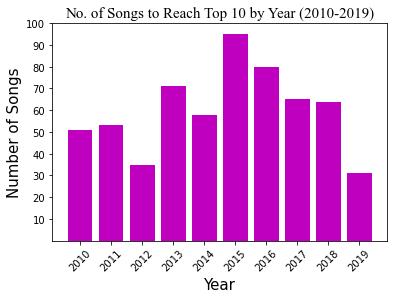

In [7]:
#Bar graph of how many songs reached top 10 per year
songs_per_year = top10s['year'].groupby(top10s['year']).count()
songs_per_year = songs_per_year.to_frame()
songs_per_year.columns = ['n']
songs_per_year.reset_index(inplace = True)
songs_per_year.columns = ['year','n']

plt.bar(songs_per_year.year, songs_per_year.n, color = 'm')
plt.xticks(songs_per_year.year, rotation = 45)
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('No. of Songs to Reach Top 10 by Year (2010-2019)', fontsize=15, fontname='Times New Roman')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of Songs", fontsize = 15)
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.show()

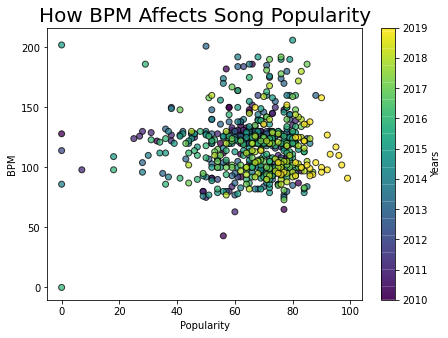

In [8]:
#Visualization of bpm, nrgy, dnce, etc.
#scatter plot for bpm(and maybe others)? Look for clustering
pop = top10s['pop']
bpm = top10s['bpm']
year = top10s['year']
plt.scatter(pop, bpm, c= year, edgecolor = 'black', linewidth = 1, alpha = 0.75)
cbar = plt.colorbar()
cbar.set_label('Years')
plt.xlabel('Popularity')
plt.ylabel('BPM')
plt.title('How BPM Affects Song Popularity', fontsize = 20)
plt.tight_layout()
plt.show()

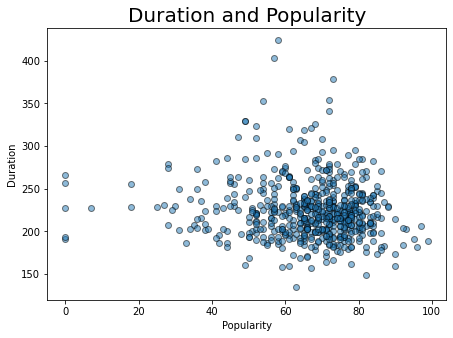

In [9]:
duration = top10s['dur']
popularity = top10s['pop']
plt.scatter(pop, duration, edgecolor = 'black', linewidth = 1, alpha = 0.5)
plt.xlabel('Popularity')
plt.ylabel('Duration')
plt.title('Duration and Popularity', fontsize = 20)
plt.tight_layout()
plt.show()

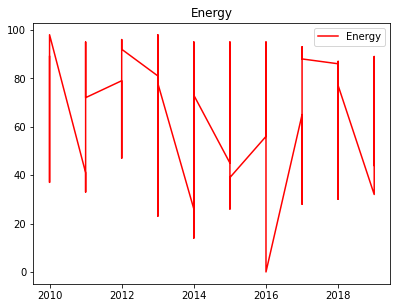

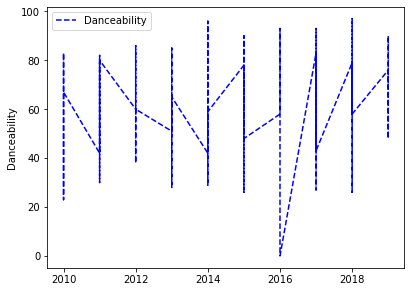

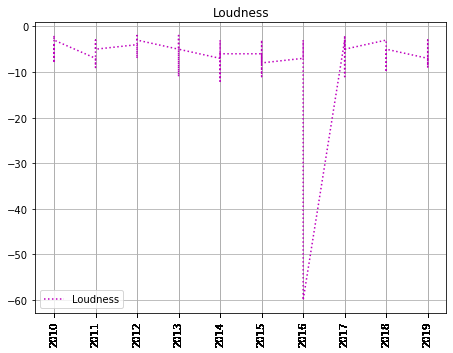

In [10]:
year = top10s['year']
energy = top10s['nrgy']
dance = top10s['dnce']
loudness = top10s['dB']
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
ax1.plot(year, energy, 'r-', label='Energy')
ax2.plot(year, dance, 'b--', label = 'Danceability')
ax3.plot(year, loudness, 'm:', label = 'Loudness')
ax1.legend()
ax1.set_title('Energy')
ax2.legend()
ax2.set_ylabel('Danceability')
ax3.legend()
ax3.set_title('Loudness')
plt.tight_layout()
plt.xticks(top10s['year'], rotation = '90')
plt.grid()
plt.show()

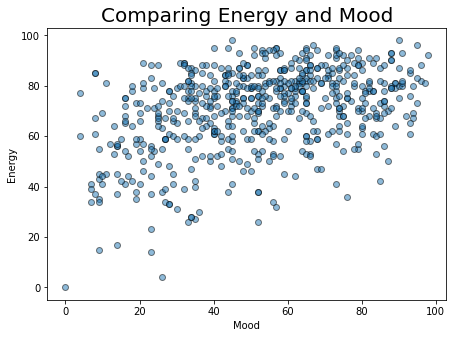

In [11]:
mood = top10s['val']
energy = top10s['nrgy']
plt.scatter(mood, energy, edgecolor = 'black', linewidth = 1, alpha = 0.5)
plt.xlabel('Mood')
plt.ylabel('Energy')
plt.title('Comparing Energy and Mood', fontsize = 20)
plt.tight_layout()
plt.show()

The equation of the regression line is: 0.126x + 58.413


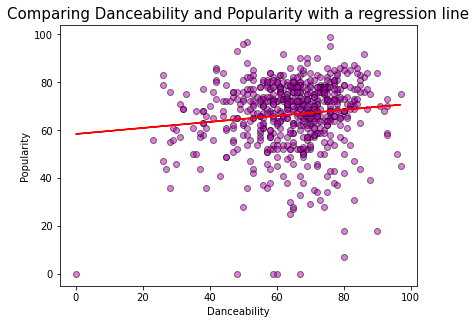

In [23]:
x = np.array(top10s['dnce'])
y = np.array(top10s['pop'])
plt.scatter(x, y, c = 'm', edgecolor = 'black', linewidth = 1, alpha = 0.5)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Comparing Danceability and Popularity with a regression line', fontsize = 15)
print("The equation of the regression line is: " + str(round(m, 3)) + "x + " + str(round(b, 3)))

The equation of the regression line is: 0.011x + 65.203


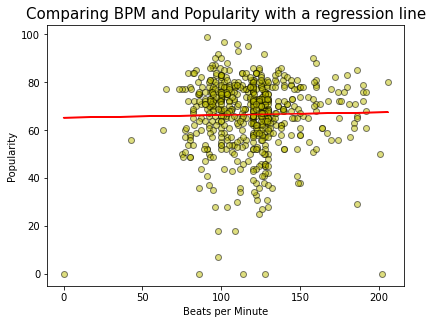

In [28]:
x = np.array(top10s['bpm'])
y = np.array(top10s['pop'])
plt.scatter(x, y, c = 'y', edgecolor = 'black', linewidth = 1, alpha = 0.5)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r')
plt.xlabel('Beats per Minute')
plt.ylabel('Popularity')
plt.title('Comparing BPM and Popularity with a regression line', fontsize = 15)
print("The equation of the regression line is: " + str(round(m, 3)) + "x + " + str(round(b, 3)))

The equation of the regression line is: -0.084x + 68.013


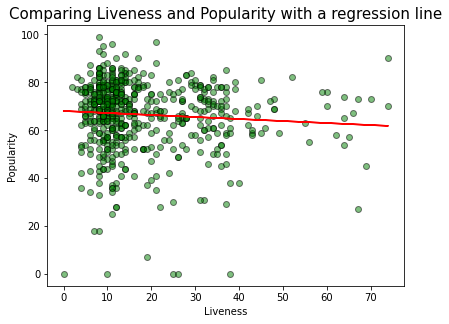

In [30]:
x = np.array(top10s['live'])
y = np.array(top10s['pop'])
plt.scatter(x, y, c = 'g', edgecolor = 'black', linewidth = 1, alpha = 0.5)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r')
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.title('Comparing Liveness and Popularity with a regression line', fontsize = 15)
print("The equation of the regression line is: " + str(round(m, 3)) + "x + " + str(round(b, 3)))

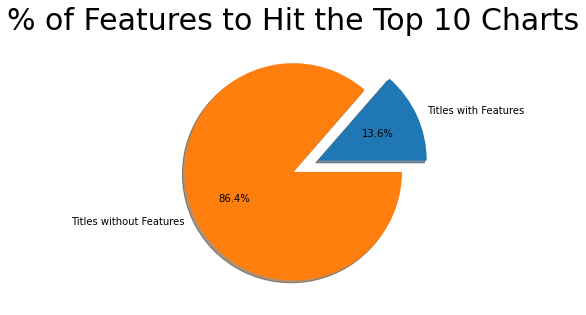

In [88]:
#Mention features, how many, genres more likely to have features, etc.

with_feat = []
without_feat = []
for title in top10s.title:
    title = title.lower()
    if (title.find("feat") != -1 or title.find("with") != -1 or title.find("vs") != -1): 
        with_feat.append(title)
    else:
        without_feat.append(title)

feat_pie = pd.DataFrame( {'labels':['Titles with Features', 'Titles without Features'],
                        'count': [len(songs_with_you), len(songs_without_you)]})  
feat_pie

#Pie chart with percentage of song with features 
plt.pie(feat_pie['count'], labels = feat_pie['labels'], explode = [.25,0],
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('% of Features to Hit the Top 10 Charts', fontsize=30)
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.show()

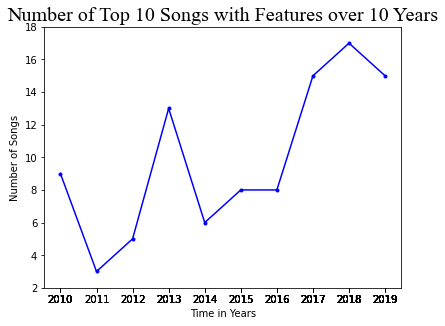

In [93]:
feats = top10s[(top10s['title'].str.contains('feat')) | (top10s['title'].str.contains('with')) | (top10s['title'].str.contains('vs'))]
feats #99 total features

#features per year 
year_count = feats['title'].groupby([feats['year']]).count()
year_count

#histogram decribing number of songs with features to reach top 10 charts
plt.plot(year_count, 'b.-')
plt.xticks(feats['year'])
plt.yticks([2,4,6,8,10,12,14,16,18])
plt.title('Number of Top 10 Songs with Features over 10 Years', fontsize=20, fontname='Times New Roman')
plt.xlabel("Time in Years")
plt.ylabel("Number of Songs")
plt.show()


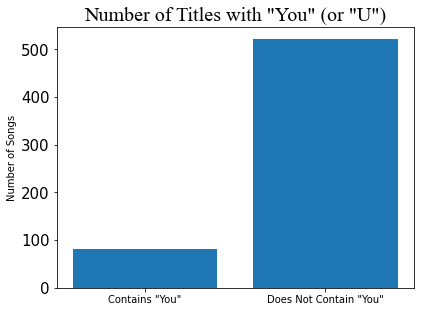

In [74]:
songs_with_you = []
songs_without_you = []
for title in top10s.title:
    title = title.lower()
    if (title.find("you") != -1 or title.find("YOU") != -1 or title.find("U") != -1): 
        songs_with_you.append(title)
    else:
        songs_without_you.append(title)

you_df = pd.DataFrame( {'Has_you':['Contains "You"','Does Not Contain "You"'],
                        'n': [len(songs_with_you), len(songs_without_you)]})  
you_df

plt.bar(you_df.Has_you, you_df.n)
plt.xticks(you_df.Has_you)
plt.yticks(fontsize = 15)
plt.title('Number of Titles with "You" (or "U")', fontsize=20, fontname='Times New Roman')
plt.ylabel("Number of Songs")
plt.show()

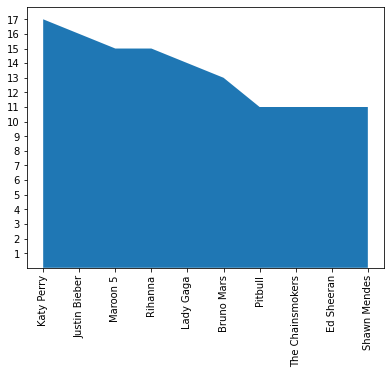

In [10]:
#Selecting top 10 artists with a song from the top 10s and visualizing how many each had
top10s_count = top10s['artist'].value_counts()[0:10]
top10s_count
artists_yr = top10s['artist'].value_counts().keys()[0:10]
plt.stackplot(artists_yr, top10s_count)
plt.xticks(artists_yr, rotation = 90)
plt.xticks(np.arange(0, len(artists_yr),1))
plt.yticks(np.arange(1, max(top10s_count)+1, 1))
plt.show()

In [11]:
#Looking at the first 5 years compared to the last 5 years, make graphs of genres (and maybe other variables) and see if theres a variation



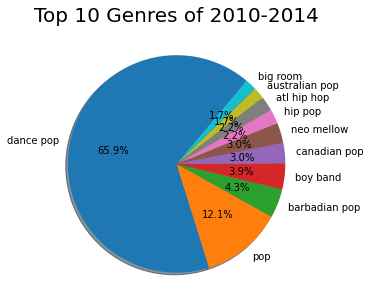

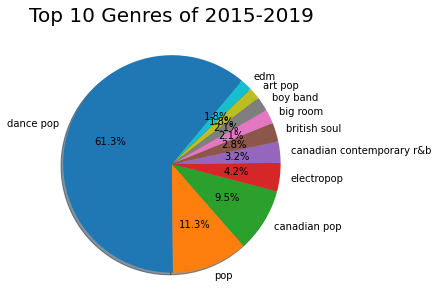

In [120]:
top10s_first_five = top10s[top10s['year']<=2014]
top10s_second_five = top10s[top10s['year'] > 2014]

#Pie chart with percentages of genres over 2010-2014 years
count = top10s_first_five['top genre'].value_counts().iloc[:10]
gen = top10s_first_five['top genre'].value_counts().iloc[:10].index
genre_pie = plt.pie(count, labels = gen,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Top 10 Genres of 2010-2014', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.show() 

#Pie chart with percentages of genres over 2015-2019 years
count = top10s_second_five['top genre'].value_counts().iloc[:10]
gen = top10s_second_five['top genre'].value_counts().iloc[:10].index
genre_pie = plt.pie(count, labels = gen,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Top 10 Genres of 2015-2019', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.show()

Dance Pop & Pop held steady through the years, though they began to drop in the latter half of the decade. The key differences between the first and secondhalf of the decade are that Canadian Pop jumped significantly, Canadian contemporary R&B gained a foothold, and electropop appeared on the radar. Hip Hop and Australian pop fell off the top ten list

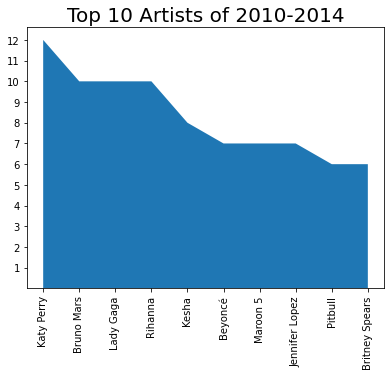

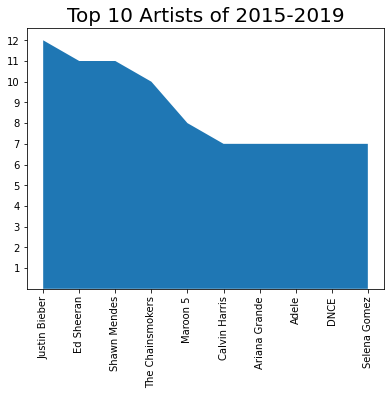

In [121]:
#Selecting top 10 artists with a song from the top 10s and visualizing how many each had
top10s_count1 = top10s_first_five['artist'].value_counts()[0:10]
top10s_count2 = top10s_second_five['artist'].value_counts()[0:10]
artists_yr = top10s_first_five['artist'].value_counts().keys()[0:10]
artists_yr2 = top10s_second_five['artist'].value_counts().keys()[0:10]


plt.stackplot(artists_yr, top10s_count1)
plt.xticks(artists_yr, rotation = 90)
plt.xticks(np.arange(0, len(artists_yr),1))
plt.yticks(np.arange(1, max(top10s_count1)+1, 1))
plt.title('Top 10 Artists of 2010-2014', fontsize=20)
plt.show()


plt.stackplot(artists_yr2, top10s_count2)
plt.xticks(artists_yr2, rotation = 90)
plt.xticks(np.arange(0, len(artists_yr2),1))
plt.yticks(np.arange(1, max(top10s_count2)+1, 1))
plt.title('Top 10 Artists of 2015-2019', fontsize=20)
plt.show()


In splitting the decade into two groups, it highlights an interesting detail. None of the top 10, (excluding Maroon 5), in the first half of the decade, make it on top ten list for the 2nd half of the decade. 

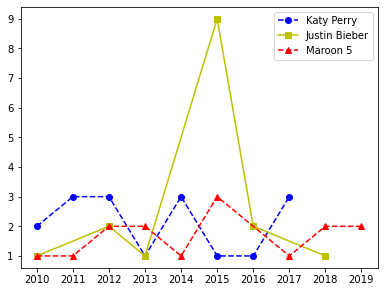

In [122]:
Num1 = top10s.loc[top10s['artist'] =='Katy Perry']
Num2 = top10s.loc[top10s['artist'] =='Bruno Mars']
Num3 = top10s.loc[top10s['artist'] =='Justin Bieber']
Num4 = top10s.loc[top10s['artist'] =='Maroon 5']

Num1_count = Num1['artist'].groupby([Num1['year']]).count()
Num2_count = Num2['artist'].groupby([Num2['year']]).count()
Num3_count = Num3['artist'].groupby([Num3['year']]).count()
Num4_count = Num4['artist'].groupby([Num4['year']]).count()

Num1_count = Num1_count.to_frame()
Num1_count.columns = ['n']
Num1_count.reset_index(inplace = True)
Num1_count.columns = ['year', 'n']

x1 = Num1_count.year
y1 = Num1_count.n

Num2_count = Num2_count.to_frame()
Num2_count.columns = ['n']
Num2_count.reset_index(inplace = True)
Num2_count.columns = ['year', 'n']

x2 = Num2_count.year
y2 = Num2_count.n


Num3_count = Num3_count.to_frame()
Num3_count.columns = ['n']
Num3_count.reset_index(inplace = True)
Num3_count.columns = ['year', 'n']

x3 = Num3_count.year
y3 = Num3_count.n

Num4_count = Num4_count.to_frame()
Num4_count.columns = ['n']
Num4_count.reset_index(inplace = True)
Num4_count.columns = ['year', 'n']

x4 = Num4_count.year
y4 = Num4_count.n


plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.plot(x1,y1,'bo--', x3,y3,'ys-',x4,y4,'r^--' )
plt.legend(['Katy Perry','Justin Bieber','Maroon 5'], loc=1)
plt.show()


Comparing the top 3 in the top ten list. Katy Perry and Maroon 5 had their ups and down thru the years accumulating their totals slowly, but Justin Bieber earned his spot in the top ten in one year. This also shows that Katy Perry had her stronger years from 2010-2014, explaining why she fell off the top ten in the graph of the later years. We can also see here that Maroon 5 was the most consistent, accounting for him making the sole appearance in the top 10 in both the first and second half of the decade.

